# 1. Setup dataset and SNN model

In [1]:
import snntorch as snn
from snntorch import spikeplot as splt
from snntorch import spikegen

import torch
import torch.nn as nn
import numpy as np

from torch.utils.data.dataset import Dataset
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

import matplotlib.pyplot as plt

import models
import datasets
import plot
import train


In [2]:
dtype = torch.float
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
#device = torch.device("cpu")
batch_size = 256
dataset = 'xor'
dynamic_input = False
num_steps = 2
seed = np.random.randint(100) #tried values: 37,67,30
#seed = 30
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
path = './jupyter_images/'


In [3]:
# load dataset and visualize it before training
if dataset == 'linear':
    toydata_train = datasets.Linear_ToyDataset(size=2048, seed=3)
    toydata_test = datasets.Linear_ToyDataset(size=400, seed=123)
elif dataset == 'relu':
    toydata_train = datasets.ReLU_ToyDataset(size=2048, seed=4)
    toydata_test = datasets.ReLU_ToyDataset(size=400, seed=123)
elif dataset == 'dynamic':
    toydata_train = datasets.Dynamic_ToyDataset(size=2048, seed=4)
    toydata_test = datasets.Dynamic_ToyDataset(size=400, seed = 123)
elif dataset == 'xor':
    toydata_train = datasets.XOR_ToyDataset(size=2048, seed=3)
    toydata_test = datasets.XOR_ToyDataset(size=400, seed=123)

    
train_loader = DataLoader(toydata_train, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(toydata_test, batch_size=batch_size, shuffle=True)

# 2. SNN experiments

In [4]:
snn = models.SNN(num_steps=num_steps,dynamic_input=dynamic_input).to(device)
print(snn)

SNN(
  (fc1): Linear(in_features=2, out_features=2, bias=True)
  (lif1): Leaky()
  (fc2): Linear(in_features=2, out_features=2, bias=True)
  (lif2): Leaky()
)


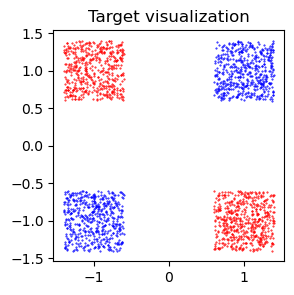

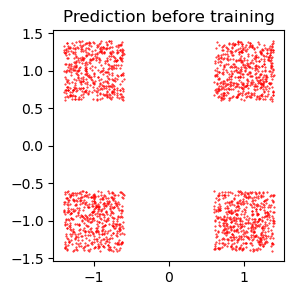

In [5]:
if dynamic_input== True:
    plot.get_plot_dynamic(None, train_loader,label='target',dataset=dataset, path=path, trained=False)
    plot.get_plot_dynamic(snn, train_loader,label='prediction',dataset=dataset, path=path, trained=False)
else:
    plot.get_plot(None, train_loader, label='target', dataset=dataset, path=path, trained=False)
    plot.get_plot(snn, train_loader, label='prediction',dataset=dataset, path=path, trained=False)

In [ ]:
# Set box_size=1 to match with the network prediction
# Increase box_size to visualize more regions
plot.count_regions(snn,num=100, box_size = 4, layer_indices = [0,1], path=path, trained=False)

  0%|          | 3/1000 [00:00<02:07,  7.82it/s]

Epoch 0
Train loss: 0.69
Test loss: 0.69
Train accuracy: 49.85 %
Test accuracy: 53.25 %


  1%|▏         | 13/1000 [00:01<01:18, 12.54it/s]

Epoch 10
Train loss: 0.69
Test loss: 0.69
Train accuracy: 49.85 %
Test accuracy: 53.25 %


  2%|▏         | 23/1000 [00:01<01:12, 13.39it/s]

Epoch 20
Train loss: 0.69
Test loss: 0.69
Train accuracy: 49.85 %
Test accuracy: 53.25 %


  3%|▎         | 33/1000 [00:02<01:10, 13.73it/s]

Epoch 30
Train loss: 0.69
Test loss: 0.69
Train accuracy: 49.85 %
Test accuracy: 53.25 %


  4%|▍         | 43/1000 [00:03<01:09, 13.75it/s]

Epoch 40
Train loss: 0.66
Test loss: 0.66
Train accuracy: 49.85 %
Test accuracy: 53.25 %


  5%|▌         | 53/1000 [00:04<01:11, 13.22it/s]

Epoch 50
Train loss: 0.61
Test loss: 0.60
Train accuracy: 49.85 %
Test accuracy: 53.25 %


  6%|▋         | 63/1000 [00:04<01:15, 12.45it/s]

Epoch 60
Train loss: 0.60
Test loss: 0.60
Train accuracy: 49.85 %
Test accuracy: 53.25 %


  7%|▋         | 73/1000 [00:05<01:16, 12.07it/s]

Epoch 70
Train loss: 0.60
Test loss: 0.60
Train accuracy: 49.85 %
Test accuracy: 53.25 %


  8%|▊         | 83/1000 [00:06<01:16, 12.00it/s]

Epoch 80
Train loss: 0.59
Test loss: 0.59
Train accuracy: 49.85 %
Test accuracy: 53.25 %


  9%|▉         | 93/1000 [00:07<01:08, 13.24it/s]

Epoch 90
Train loss: 0.56
Test loss: 0.56
Train accuracy: 49.85 %
Test accuracy: 53.25 %


 10%|█         | 103/1000 [00:08<01:05, 13.60it/s]

Epoch 100
Train loss: 0.53
Test loss: 0.53
Train accuracy: 49.85 %
Test accuracy: 53.25 %


 11%|█▏        | 113/1000 [00:08<01:05, 13.56it/s]

Epoch 110
Train loss: 0.51
Test loss: 0.50
Train accuracy: 49.85 %
Test accuracy: 53.25 %


 12%|█▏        | 123/1000 [00:09<01:05, 13.37it/s]

Epoch 120
Train loss: 0.49
Test loss: 0.48
Train accuracy: 49.85 %
Test accuracy: 53.25 %


 13%|█▎        | 133/1000 [00:10<01:06, 13.10it/s]

Epoch 130
Train loss: 0.49
Test loss: 0.47
Train accuracy: 49.85 %
Test accuracy: 53.25 %


 14%|█▍        | 143/1000 [00:11<01:03, 13.51it/s]

Epoch 140
Train loss: 0.47
Test loss: 0.46
Train accuracy: 49.85 %
Test accuracy: 53.25 %


 15%|█▌        | 153/1000 [00:11<01:01, 13.79it/s]

Epoch 150
Train loss: 0.46
Test loss: 0.44
Train accuracy: 49.85 %
Test accuracy: 53.25 %


 16%|█▋        | 163/1000 [00:12<01:00, 13.83it/s]

Epoch 160
Train loss: 0.45
Test loss: 0.43
Train accuracy: 49.85 %
Test accuracy: 53.25 %


 17%|█▋        | 173/1000 [00:13<01:00, 13.58it/s]

Epoch 170
Train loss: 0.45
Test loss: 0.42
Train accuracy: 49.85 %
Test accuracy: 53.25 %


 18%|█▊        | 183/1000 [00:13<00:59, 13.64it/s]

Epoch 180
Train loss: 0.44
Test loss: 0.42
Train accuracy: 49.85 %
Test accuracy: 53.25 %


 19%|█▉        | 193/1000 [00:14<00:59, 13.66it/s]

Epoch 190
Train loss: 0.43
Test loss: 0.41
Train accuracy: 49.85 %
Test accuracy: 53.25 %


 20%|██        | 203/1000 [00:15<00:57, 13.82it/s]

Epoch 200
Train loss: 0.43
Test loss: 0.41
Train accuracy: 49.85 %
Test accuracy: 53.25 %


 21%|██▏       | 213/1000 [00:16<00:57, 13.77it/s]

Epoch 210
Train loss: 0.43
Test loss: 0.40
Train accuracy: 49.85 %
Test accuracy: 53.25 %


 22%|██▏       | 223/1000 [00:16<00:57, 13.50it/s]

Epoch 220
Train loss: 0.42
Test loss: 0.40
Train accuracy: 49.85 %
Test accuracy: 53.25 %


 23%|██▎       | 233/1000 [00:17<00:56, 13.64it/s]

Epoch 230
Train loss: 0.42
Test loss: 0.40
Train accuracy: 49.85 %
Test accuracy: 53.25 %


 24%|██▍       | 243/1000 [00:18<00:54, 13.81it/s]

Epoch 240
Train loss: 0.42
Test loss: 0.40
Train accuracy: 49.85 %
Test accuracy: 53.25 %


 25%|██▌       | 253/1000 [00:18<00:54, 13.64it/s]

Epoch 250
Train loss: 0.42
Test loss: 0.40
Train accuracy: 49.85 %
Test accuracy: 53.25 %


 26%|██▋       | 263/1000 [00:19<00:53, 13.81it/s]

Epoch 260
Train loss: 0.42
Test loss: 0.40
Train accuracy: 49.85 %
Test accuracy: 53.25 %


 27%|██▋       | 273/1000 [00:20<00:53, 13.55it/s]

Epoch 270
Train loss: 0.41
Test loss: 0.40
Train accuracy: 49.85 %
Test accuracy: 53.25 %


 28%|██▊       | 283/1000 [00:21<00:52, 13.58it/s]

Epoch 280
Train loss: 0.41
Test loss: 0.40
Train accuracy: 49.85 %
Test accuracy: 53.25 %


 29%|██▉       | 293/1000 [00:21<00:51, 13.67it/s]

Epoch 290
Train loss: 0.41
Test loss: 0.40
Train accuracy: 49.85 %
Test accuracy: 53.25 %


 30%|███       | 303/1000 [00:22<00:51, 13.65it/s]

Epoch 300
Train loss: 0.42
Test loss: 0.40
Train accuracy: 49.85 %
Test accuracy: 53.25 %


 31%|███▏      | 313/1000 [00:23<00:50, 13.54it/s]

Epoch 310
Train loss: 0.42
Test loss: 0.40
Train accuracy: 49.85 %
Test accuracy: 53.25 %


 32%|███▏      | 323/1000 [00:24<00:48, 13.82it/s]

Epoch 320
Train loss: 0.42
Test loss: 0.40
Train accuracy: 49.85 %
Test accuracy: 53.25 %


 33%|███▎      | 333/1000 [00:24<00:49, 13.58it/s]

Epoch 330
Train loss: 0.42
Test loss: 0.40
Train accuracy: 49.85 %
Test accuracy: 53.25 %


 34%|███▍      | 343/1000 [00:25<00:50, 13.03it/s]

Epoch 340
Train loss: 0.42
Test loss: 0.41
Train accuracy: 49.85 %
Test accuracy: 53.25 %


 35%|███▌      | 353/1000 [00:26<00:49, 13.18it/s]

Epoch 350
Train loss: 0.34
Test loss: 0.32
Train accuracy: 74.76 %
Test accuracy: 78.00 %


 36%|███▋      | 363/1000 [00:26<00:47, 13.51it/s]

Epoch 360
Train loss: 0.34
Test loss: 0.32
Train accuracy: 74.76 %
Test accuracy: 78.00 %


 37%|███▋      | 373/1000 [00:27<00:45, 13.80it/s]

Epoch 370
Train loss: 0.34
Test loss: 0.32
Train accuracy: 74.76 %
Test accuracy: 78.00 %


 38%|███▊      | 383/1000 [00:28<00:44, 13.77it/s]

Epoch 380
Train loss: 0.34
Test loss: 0.31
Train accuracy: 74.76 %
Test accuracy: 78.00 %


 39%|███▉      | 393/1000 [00:29<00:44, 13.65it/s]

Epoch 390
Train loss: 0.33
Test loss: 0.31
Train accuracy: 74.76 %
Test accuracy: 78.00 %


 40%|████      | 403/1000 [00:29<00:42, 13.91it/s]

Epoch 400
Train loss: 0.33
Test loss: 0.31
Train accuracy: 74.76 %
Test accuracy: 78.00 %


 41%|████▏     | 413/1000 [00:30<00:41, 13.98it/s]

Epoch 410
Train loss: 0.33
Test loss: 0.31
Train accuracy: 74.76 %
Test accuracy: 78.00 %


 42%|████▏     | 423/1000 [00:31<00:41, 13.91it/s]

Epoch 420
Train loss: 0.33
Test loss: 0.31
Train accuracy: 74.76 %
Test accuracy: 78.00 %


 43%|████▎     | 433/1000 [00:32<00:42, 13.37it/s]

Epoch 430
Train loss: 0.28
Test loss: 0.27
Train accuracy: 74.76 %
Test accuracy: 78.00 %


 44%|████▍     | 443/1000 [00:32<00:41, 13.42it/s]

Epoch 440
Train loss: 0.28
Test loss: 0.27
Train accuracy: 74.76 %
Test accuracy: 78.00 %


 45%|████▌     | 453/1000 [00:33<00:40, 13.61it/s]

Epoch 450
Train loss: 0.28
Test loss: 0.27
Train accuracy: 74.76 %
Test accuracy: 78.00 %


 46%|████▋     | 463/1000 [00:34<00:38, 13.79it/s]

Epoch 460
Train loss: 0.28
Test loss: 0.26
Train accuracy: 74.76 %
Test accuracy: 78.00 %


 47%|████▋     | 473/1000 [00:34<00:38, 13.53it/s]

Epoch 470
Train loss: 0.28
Test loss: 0.26
Train accuracy: 74.76 %
Test accuracy: 78.00 %


 48%|████▊     | 483/1000 [00:35<00:37, 13.72it/s]

Epoch 480
Train loss: 0.28
Test loss: 0.26
Train accuracy: 74.76 %
Test accuracy: 78.00 %


 49%|████▉     | 493/1000 [00:36<00:38, 13.22it/s]

Epoch 490
Train loss: 0.28
Test loss: 0.26
Train accuracy: 74.76 %
Test accuracy: 78.00 %


 50%|█████     | 503/1000 [00:37<00:36, 13.50it/s]

Epoch 500
Train loss: 0.28
Test loss: 0.25
Train accuracy: 74.76 %
Test accuracy: 78.00 %


 51%|█████▏    | 513/1000 [00:38<00:40, 12.12it/s]

Epoch 510
Train loss: 0.28
Test loss: 0.25
Train accuracy: 74.76 %
Test accuracy: 78.00 %


 52%|█████▏    | 523/1000 [00:38<00:39, 12.15it/s]

Epoch 520
Train loss: 0.28
Test loss: 0.25
Train accuracy: 74.76 %
Test accuracy: 78.00 %


 53%|█████▎    | 533/1000 [00:39<00:37, 12.56it/s]

Epoch 530
Train loss: 0.28
Test loss: 0.25
Train accuracy: 74.76 %
Test accuracy: 78.00 %


 54%|█████▍    | 543/1000 [00:40<00:36, 12.61it/s]

Epoch 540
Train loss: 0.27
Test loss: 0.25
Train accuracy: 74.76 %
Test accuracy: 78.00 %


 55%|█████▌    | 553/1000 [00:41<00:35, 12.61it/s]

Epoch 550
Train loss: 0.27
Test loss: 0.25
Train accuracy: 74.76 %
Test accuracy: 78.00 %


 56%|█████▋    | 563/1000 [00:42<00:37, 11.58it/s]

Epoch 560
Train loss: 0.17
Test loss: 0.17
Train accuracy: 100.00 %
Test accuracy: 100.00 %


 57%|█████▋    | 573/1000 [00:42<00:39, 10.74it/s]

Epoch 570
Train loss: 0.17
Test loss: 0.17
Train accuracy: 100.00 %
Test accuracy: 100.00 %


 58%|█████▊    | 583/1000 [00:43<00:33, 12.41it/s]

Epoch 580
Train loss: 0.13
Test loss: 0.13
Train accuracy: 100.00 %
Test accuracy: 100.00 %


 59%|█████▉    | 593/1000 [00:44<00:30, 13.26it/s]

Epoch 590
Train loss: 0.13
Test loss: 0.13
Train accuracy: 100.00 %
Test accuracy: 100.00 %


 60%|██████    | 603/1000 [00:45<00:29, 13.36it/s]

Epoch 600
Train loss: 0.13
Test loss: 0.13
Train accuracy: 100.00 %
Test accuracy: 100.00 %


 61%|██████▏   | 613/1000 [00:45<00:29, 13.23it/s]

Epoch 610
Train loss: 0.13
Test loss: 0.13
Train accuracy: 100.00 %
Test accuracy: 100.00 %


 62%|██████▏   | 623/1000 [00:46<00:28, 13.44it/s]

Epoch 620
Train loss: 0.13
Test loss: 0.13
Train accuracy: 100.00 %
Test accuracy: 100.00 %


 63%|██████▎   | 633/1000 [00:47<00:27, 13.24it/s]

Epoch 630
Train loss: 0.13
Test loss: 0.13
Train accuracy: 100.00 %
Test accuracy: 100.00 %


 64%|██████▍   | 643/1000 [00:48<00:26, 13.40it/s]

Epoch 640
Train loss: 0.13
Test loss: 0.13
Train accuracy: 100.00 %
Test accuracy: 100.00 %


 65%|██████▌   | 653/1000 [00:48<00:25, 13.44it/s]

Epoch 650
Train loss: 0.13
Test loss: 0.13
Train accuracy: 100.00 %
Test accuracy: 100.00 %


 66%|██████▋   | 663/1000 [00:49<00:25, 13.32it/s]

Epoch 660
Train loss: 0.13
Test loss: 0.13
Train accuracy: 100.00 %
Test accuracy: 100.00 %


 67%|██████▋   | 673/1000 [00:50<00:24, 13.62it/s]

Epoch 670
Train loss: 0.13
Test loss: 0.13
Train accuracy: 100.00 %
Test accuracy: 100.00 %


 68%|██████▊   | 683/1000 [00:51<00:23, 13.33it/s]

Epoch 680
Train loss: 0.13
Test loss: 0.13
Train accuracy: 100.00 %
Test accuracy: 100.00 %


 69%|██████▉   | 693/1000 [00:51<00:22, 13.38it/s]

Epoch 690
Train loss: 0.13
Test loss: 0.13
Train accuracy: 100.00 %
Test accuracy: 100.00 %


 70%|███████   | 703/1000 [00:52<00:21, 13.52it/s]

Epoch 700
Train loss: 0.13
Test loss: 0.13
Train accuracy: 100.00 %
Test accuracy: 100.00 %


 71%|███████▏  | 713/1000 [00:53<00:20, 13.93it/s]

Epoch 710
Train loss: 0.13
Test loss: 0.13
Train accuracy: 100.00 %
Test accuracy: 100.00 %


 72%|███████▏  | 723/1000 [00:54<00:20, 13.58it/s]

Epoch 720
Train loss: 0.13
Test loss: 0.13
Train accuracy: 100.00 %
Test accuracy: 100.00 %


 73%|███████▎  | 733/1000 [00:54<00:20, 13.34it/s]

Epoch 730
Train loss: 0.13
Test loss: 0.13
Train accuracy: 100.00 %
Test accuracy: 100.00 %


 74%|███████▍  | 743/1000 [00:55<00:18, 13.64it/s]

Epoch 740
Train loss: 0.13
Test loss: 0.13
Train accuracy: 100.00 %
Test accuracy: 100.00 %


 75%|███████▌  | 753/1000 [00:56<00:17, 13.81it/s]

Epoch 750
Train loss: 0.13
Test loss: 0.13
Train accuracy: 100.00 %
Test accuracy: 100.00 %


 76%|███████▋  | 763/1000 [00:56<00:17, 13.75it/s]

Epoch 760
Train loss: 0.13
Test loss: 0.13
Train accuracy: 100.00 %
Test accuracy: 100.00 %


 77%|███████▋  | 773/1000 [00:57<00:17, 12.93it/s]

Epoch 770
Train loss: 0.13
Test loss: 0.13
Train accuracy: 100.00 %
Test accuracy: 100.00 %


 78%|███████▊  | 783/1000 [00:58<00:16, 13.40it/s]

Epoch 780
Train loss: 0.13
Test loss: 0.13
Train accuracy: 100.00 %
Test accuracy: 100.00 %


 79%|███████▉  | 793/1000 [00:59<00:15, 13.44it/s]

Epoch 790
Train loss: 0.13
Test loss: 0.13
Train accuracy: 100.00 %
Test accuracy: 100.00 %


 80%|████████  | 803/1000 [00:59<00:14, 13.64it/s]

Epoch 800
Train loss: 0.13
Test loss: 0.13
Train accuracy: 100.00 %
Test accuracy: 100.00 %


 81%|████████▏ | 813/1000 [01:00<00:13, 13.64it/s]

Epoch 810
Train loss: 0.13
Test loss: 0.13
Train accuracy: 100.00 %
Test accuracy: 100.00 %


 82%|████████▏ | 823/1000 [01:01<00:13, 13.38it/s]

Epoch 820
Train loss: 0.13
Test loss: 0.13
Train accuracy: 100.00 %
Test accuracy: 100.00 %


 83%|████████▎ | 833/1000 [01:02<00:12, 13.61it/s]

Epoch 830
Train loss: 0.13
Test loss: 0.13
Train accuracy: 100.00 %
Test accuracy: 100.00 %


 84%|████████▍ | 843/1000 [01:02<00:11, 13.57it/s]

Epoch 840
Train loss: 0.13
Test loss: 0.13
Train accuracy: 100.00 %
Test accuracy: 100.00 %


 85%|████████▌ | 853/1000 [01:03<00:10, 13.50it/s]

Epoch 850
Train loss: 0.13
Test loss: 0.13
Train accuracy: 100.00 %
Test accuracy: 100.00 %


 86%|████████▋ | 863/1000 [01:04<00:10, 13.12it/s]

Epoch 860
Train loss: 0.13
Test loss: 0.13
Train accuracy: 100.00 %
Test accuracy: 100.00 %


 87%|████████▋ | 873/1000 [01:05<00:09, 13.34it/s]

Epoch 870
Train loss: 0.13
Test loss: 0.13
Train accuracy: 100.00 %
Test accuracy: 100.00 %


 88%|████████▊ | 883/1000 [01:05<00:08, 13.59it/s]

Epoch 880
Train loss: 0.13
Test loss: 0.13
Train accuracy: 100.00 %
Test accuracy: 100.00 %


 89%|████████▉ | 893/1000 [01:06<00:08, 13.36it/s]

Epoch 890
Train loss: 0.13
Test loss: 0.13
Train accuracy: 100.00 %
Test accuracy: 100.00 %


 90%|█████████ | 903/1000 [01:07<00:07, 13.28it/s]

Epoch 900
Train loss: 0.13
Test loss: 0.13
Train accuracy: 100.00 %
Test accuracy: 100.00 %


 91%|█████████▏| 913/1000 [01:07<00:06, 13.70it/s]

Epoch 910
Train loss: 0.13
Test loss: 0.13
Train accuracy: 100.00 %
Test accuracy: 100.00 %


 92%|█████████▏| 923/1000 [01:08<00:05, 13.62it/s]

Epoch 920
Train loss: 0.13
Test loss: 0.13
Train accuracy: 100.00 %
Test accuracy: 100.00 %


 93%|█████████▎| 933/1000 [01:09<00:04, 13.46it/s]

Epoch 930
Train loss: 0.13
Test loss: 0.13
Train accuracy: 100.00 %
Test accuracy: 100.00 %


 94%|█████████▍| 943/1000 [01:10<00:04, 13.56it/s]

Epoch 940
Train loss: 0.13
Test loss: 0.13
Train accuracy: 100.00 %
Test accuracy: 100.00 %


 95%|█████████▌| 953/1000 [01:10<00:03, 13.73it/s]

Epoch 950
Train loss: 0.13
Test loss: 0.13
Train accuracy: 100.00 %
Test accuracy: 100.00 %


 96%|█████████▋| 963/1000 [01:11<00:02, 13.77it/s]

Epoch 960
Train loss: 0.13
Test loss: 0.13
Train accuracy: 100.00 %
Test accuracy: 100.00 %


 97%|█████████▋| 973/1000 [01:12<00:01, 13.67it/s]

Epoch 970
Train loss: 0.13
Test loss: 0.13
Train accuracy: 100.00 %
Test accuracy: 100.00 %


 98%|█████████▊| 983/1000 [01:13<00:01, 13.68it/s]

Epoch 980
Train loss: 0.13
Test loss: 0.13
Train accuracy: 100.00 %
Test accuracy: 100.00 %


 99%|█████████▉| 993/1000 [01:13<00:00, 13.00it/s]

Epoch 990
Train loss: 0.13
Test loss: 0.13
Train accuracy: 100.00 %
Test accuracy: 100.00 %


100%|██████████| 1000/1000 [01:14<00:00, 13.45it/s]


Epoch 999
Train loss: 0.13
Test loss: 0.13
Train accuracy: 100.00 %
Test accuracy: 100.00 %


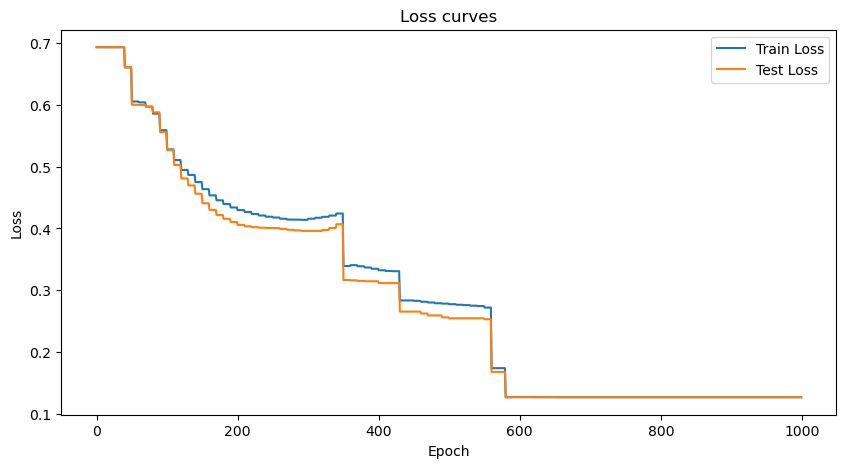

In [6]:
train_loss_hist, test_loss_hist = train.train(snn, num_steps, train_loader, test_loader, num_epochs = 1000, output='spike')
train.plot_learning_curve(train_loss_hist, test_loss_hist)

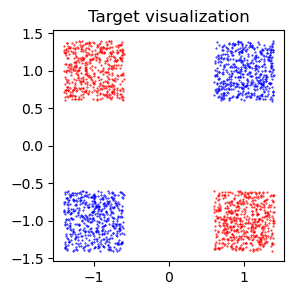

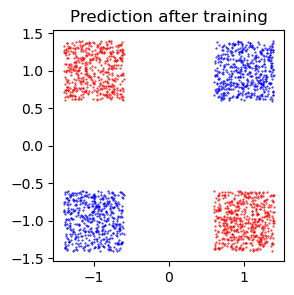

In [7]:
if dynamic_input== True:
    plot.get_plot_dynamic(None, train_loader,label='target',dataset=dataset, path=path, trained=True)
    plot.get_plot_dynamic(snn, train_loader,label='prediction',dataset=dataset, path=path, trained=True)
else:
    plot.get_plot(None, train_loader, label='target', dataset=dataset, path=path, trained=True)
    plot.get_plot(snn, train_loader, label='prediction',dataset=dataset, path=path, trained=True)

Counting the number of regions made by a trained network of the following architecture 
SNN(
  (fc1): Linear(in_features=2, out_features=2, bias=True)
  (lif1): Leaky()
  (fc2): Linear(in_features=2, out_features=2, bias=True)
  (lif2): Leaky()
)
with weight matrices tensor([[1.8193, 1.8536],
        [1.2958, 1.3163]], device='cuda:0')  and biases  tensor([ 2.2076, -1.1690], device='cuda:0')
 with 2 time steps


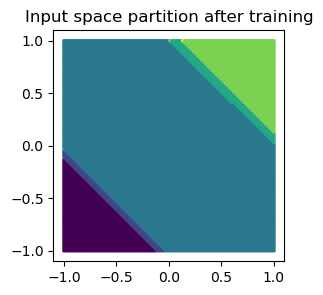

We find 5 regions according to the spike outputs of layer1


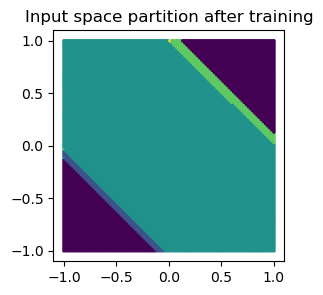

We find 4 regions according to the spike outputs of layer2


In [8]:
plot.count_regions(snn,num=100, box_size = 1, layer_indices = [0,1], path=path, trained=True)

# 3. ANN experiments

In [9]:
ann = models.ANN().to(device)
print(ann)

ANN(
  (fc1): Linear(in_features=2, out_features=2, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=2, out_features=2, bias=True)
)


ANN training epoch:   1%|          | 6/1000 [00:00<00:35, 28.26it/s]

Epoch 0
Train loss: 0.80
Test loss: 0.83
Train accuracy: 50.15 %
Test accuracy: 46.75 %


ANN training epoch:   2%|▏         | 16/1000 [00:00<00:33, 29.42it/s]

Epoch 10
Train loss: 0.77
Test loss: 0.80
Train accuracy: 50.15 %
Test accuracy: 46.75 %


ANN training epoch:   3%|▎         | 28/1000 [00:00<00:29, 32.56it/s]

Epoch 20
Train loss: 0.74
Test loss: 0.76
Train accuracy: 50.15 %
Test accuracy: 46.75 %


ANN training epoch:   4%|▎         | 36/1000 [00:01<00:28, 33.56it/s]

Epoch 30
Train loss: 0.70
Test loss: 0.72
Train accuracy: 50.15 %
Test accuracy: 46.75 %


ANN training epoch:   5%|▍         | 48/1000 [00:01<00:28, 33.72it/s]

Epoch 40
Train loss: 0.67
Test loss: 0.68
Train accuracy: 50.15 %
Test accuracy: 46.75 %


ANN training epoch:   6%|▌         | 56/1000 [00:01<00:28, 32.89it/s]

Epoch 50
Train loss: 0.63
Test loss: 0.65
Train accuracy: 61.52 %
Test accuracy: 59.25 %


ANN training epoch:   7%|▋         | 68/1000 [00:02<00:28, 32.82it/s]

Epoch 60
Train loss: 0.60
Test loss: 0.61
Train accuracy: 74.41 %
Test accuracy: 72.75 %


ANN training epoch:   8%|▊         | 77/1000 [00:02<00:27, 33.91it/s]

Epoch 70
Train loss: 0.57
Test loss: 0.58
Train accuracy: 75.98 %
Test accuracy: 74.25 %


ANN training epoch:   8%|▊         | 85/1000 [00:02<00:26, 34.51it/s]

Epoch 80
Train loss: 0.55
Test loss: 0.55
Train accuracy: 76.03 %
Test accuracy: 74.50 %


ANN training epoch:  10%|▉         | 97/1000 [00:02<00:25, 34.83it/s]

Epoch 90
Train loss: 0.52
Test loss: 0.52
Train accuracy: 75.63 %
Test accuracy: 74.25 %


ANN training epoch:  10%|█         | 105/1000 [00:03<00:27, 32.69it/s]

Epoch 100
Train loss: 0.50
Test loss: 0.50
Train accuracy: 75.24 %
Test accuracy: 74.00 %


ANN training epoch:  12%|█▏        | 117/1000 [00:03<00:25, 34.54it/s]

Epoch 110
Train loss: 0.48
Test loss: 0.48
Train accuracy: 74.85 %
Test accuracy: 73.50 %


ANN training epoch:  12%|█▎        | 125/1000 [00:03<00:25, 34.22it/s]

Epoch 120
Train loss: 0.46
Test loss: 0.46
Train accuracy: 74.37 %
Test accuracy: 73.25 %


ANN training epoch:  14%|█▎        | 137/1000 [00:04<00:24, 35.36it/s]

Epoch 130
Train loss: 0.45
Test loss: 0.44
Train accuracy: 74.17 %
Test accuracy: 73.25 %


ANN training epoch:  14%|█▍        | 145/1000 [00:04<00:25, 33.72it/s]

Epoch 140
Train loss: 0.43
Test loss: 0.43
Train accuracy: 73.78 %
Test accuracy: 73.00 %


ANN training epoch:  16%|█▌        | 158/1000 [00:04<00:23, 35.26it/s]

Epoch 150
Train loss: 0.42
Test loss: 0.42
Train accuracy: 73.58 %
Test accuracy: 73.00 %


ANN training epoch:  17%|█▋        | 166/1000 [00:05<00:24, 34.30it/s]

Epoch 160
Train loss: 0.41
Test loss: 0.41
Train accuracy: 73.54 %
Test accuracy: 73.00 %


ANN training epoch:  18%|█▊        | 178/1000 [00:05<00:23, 34.88it/s]

Epoch 170
Train loss: 0.41
Test loss: 0.40
Train accuracy: 73.58 %
Test accuracy: 73.00 %


ANN training epoch:  19%|█▊        | 186/1000 [00:05<00:23, 34.80it/s]

Epoch 180
Train loss: 0.40
Test loss: 0.39
Train accuracy: 73.49 %
Test accuracy: 73.00 %


ANN training epoch:  20%|█▉        | 198/1000 [00:05<00:23, 34.83it/s]

Epoch 190
Train loss: 0.39
Test loss: 0.39
Train accuracy: 73.58 %
Test accuracy: 73.00 %


ANN training epoch:  21%|██        | 206/1000 [00:06<00:22, 34.79it/s]

Epoch 200
Train loss: 0.39
Test loss: 0.38
Train accuracy: 73.63 %
Test accuracy: 73.00 %


ANN training epoch:  21%|██▏       | 214/1000 [00:06<00:22, 34.67it/s]

Epoch 210
Train loss: 0.38
Test loss: 0.38
Train accuracy: 73.78 %
Test accuracy: 73.00 %


ANN training epoch:  23%|██▎       | 227/1000 [00:06<00:22, 34.94it/s]

Epoch 220
Train loss: 0.38
Test loss: 0.37
Train accuracy: 73.93 %
Test accuracy: 73.00 %


ANN training epoch:  24%|██▎       | 235/1000 [00:07<00:22, 34.16it/s]

Epoch 230
Train loss: 0.38
Test loss: 0.37
Train accuracy: 74.07 %
Test accuracy: 73.25 %


ANN training epoch:  25%|██▍       | 247/1000 [00:07<00:21, 34.33it/s]

Epoch 240
Train loss: 0.37
Test loss: 0.36
Train accuracy: 74.07 %
Test accuracy: 73.25 %


ANN training epoch:  26%|██▌       | 256/1000 [00:07<00:21, 34.15it/s]

Epoch 250
Train loss: 0.37
Test loss: 0.36
Train accuracy: 74.12 %
Test accuracy: 73.25 %


ANN training epoch:  27%|██▋       | 268/1000 [00:08<00:21, 34.19it/s]

Epoch 260
Train loss: 0.37
Test loss: 0.36
Train accuracy: 74.17 %
Test accuracy: 73.25 %


ANN training epoch:  28%|██▊       | 276/1000 [00:08<00:21, 34.26it/s]

Epoch 270
Train loss: 0.37
Test loss: 0.36
Train accuracy: 74.17 %
Test accuracy: 73.25 %


ANN training epoch:  28%|██▊       | 284/1000 [00:08<00:22, 32.45it/s]

Epoch 280
Train loss: 0.36
Test loss: 0.35
Train accuracy: 74.41 %
Test accuracy: 73.25 %


ANN training epoch:  30%|██▉       | 297/1000 [00:08<00:20, 34.81it/s]

Epoch 290
Train loss: 0.36
Test loss: 0.35
Train accuracy: 74.56 %
Test accuracy: 73.25 %


ANN training epoch:  30%|███       | 305/1000 [00:09<00:19, 34.77it/s]

Epoch 300
Train loss: 0.36
Test loss: 0.35
Train accuracy: 74.61 %
Test accuracy: 73.25 %


ANN training epoch:  32%|███▏      | 318/1000 [00:09<00:19, 34.93it/s]

Epoch 310
Train loss: 0.36
Test loss: 0.35
Train accuracy: 74.61 %
Test accuracy: 73.25 %


ANN training epoch:  33%|███▎      | 326/1000 [00:09<00:19, 35.12it/s]

Epoch 320
Train loss: 0.36
Test loss: 0.35
Train accuracy: 74.61 %
Test accuracy: 73.25 %


ANN training epoch:  33%|███▎      | 334/1000 [00:09<00:19, 33.50it/s]

Epoch 330
Train loss: 0.36
Test loss: 0.35
Train accuracy: 74.76 %
Test accuracy: 73.50 %


ANN training epoch:  35%|███▍      | 347/1000 [00:10<00:18, 34.48it/s]

Epoch 340
Train loss: 0.36
Test loss: 0.35
Train accuracy: 74.85 %
Test accuracy: 73.75 %


ANN training epoch:  36%|███▌      | 355/1000 [00:10<00:19, 33.88it/s]

Epoch 350
Train loss: 0.35
Test loss: 0.34
Train accuracy: 75.05 %
Test accuracy: 73.75 %


ANN training epoch:  37%|███▋      | 367/1000 [00:10<00:18, 33.81it/s]

Epoch 360
Train loss: 0.35
Test loss: 0.34
Train accuracy: 75.15 %
Test accuracy: 73.75 %


ANN training epoch:  38%|███▊      | 375/1000 [00:11<00:18, 34.71it/s]

Epoch 370
Train loss: 0.35
Test loss: 0.34
Train accuracy: 75.15 %
Test accuracy: 73.75 %


ANN training epoch:  39%|███▊      | 387/1000 [00:11<00:17, 34.58it/s]

Epoch 380
Train loss: 0.35
Test loss: 0.34
Train accuracy: 75.20 %
Test accuracy: 73.75 %


ANN training epoch:  40%|███▉      | 395/1000 [00:11<00:17, 34.78it/s]

Epoch 390
Train loss: 0.35
Test loss: 0.34
Train accuracy: 75.24 %
Test accuracy: 73.75 %


ANN training epoch:  41%|████      | 407/1000 [00:12<00:17, 33.99it/s]

Epoch 400
Train loss: 0.35
Test loss: 0.34
Train accuracy: 75.39 %
Test accuracy: 73.75 %


ANN training epoch:  42%|████▏     | 415/1000 [00:12<00:17, 33.62it/s]

Epoch 410
Train loss: 0.35
Test loss: 0.34
Train accuracy: 75.39 %
Test accuracy: 74.00 %


ANN training epoch:  43%|████▎     | 427/1000 [00:12<00:16, 34.52it/s]

Epoch 420
Train loss: 0.35
Test loss: 0.34
Train accuracy: 75.44 %
Test accuracy: 74.00 %


ANN training epoch:  44%|████▎     | 435/1000 [00:12<00:16, 33.36it/s]

Epoch 430
Train loss: 0.35
Test loss: 0.34
Train accuracy: 75.44 %
Test accuracy: 74.00 %


ANN training epoch:  45%|████▍     | 447/1000 [00:13<00:15, 34.62it/s]

Epoch 440
Train loss: 0.35
Test loss: 0.34
Train accuracy: 75.49 %
Test accuracy: 74.00 %


ANN training epoch:  46%|████▌     | 455/1000 [00:13<00:16, 33.76it/s]

Epoch 450
Train loss: 0.35
Test loss: 0.34
Train accuracy: 75.59 %
Test accuracy: 74.25 %


ANN training epoch:  47%|████▋     | 467/1000 [00:13<00:15, 33.88it/s]

Epoch 460
Train loss: 0.35
Test loss: 0.34
Train accuracy: 75.63 %
Test accuracy: 74.25 %


ANN training epoch:  48%|████▊     | 475/1000 [00:14<00:15, 33.45it/s]

Epoch 470
Train loss: 0.35
Test loss: 0.34
Train accuracy: 75.63 %
Test accuracy: 74.25 %


ANN training epoch:  48%|████▊     | 484/1000 [00:14<00:15, 34.38it/s]

Epoch 480
Train loss: 0.35
Test loss: 0.34
Train accuracy: 75.73 %
Test accuracy: 74.25 %


ANN training epoch:  50%|████▉     | 496/1000 [00:14<00:14, 33.76it/s]

Epoch 490
Train loss: 0.35
Test loss: 0.34
Train accuracy: 75.73 %
Test accuracy: 74.25 %


ANN training epoch:  51%|█████     | 508/1000 [00:15<00:14, 35.11it/s]

Epoch 500
Train loss: 0.35
Test loss: 0.34
Train accuracy: 75.73 %
Test accuracy: 74.25 %


ANN training epoch:  52%|█████▏    | 516/1000 [00:15<00:14, 34.50it/s]

Epoch 510
Train loss: 0.35
Test loss: 0.34
Train accuracy: 75.73 %
Test accuracy: 74.25 %


ANN training epoch:  53%|█████▎    | 528/1000 [00:15<00:13, 34.70it/s]

Epoch 520
Train loss: 0.35
Test loss: 0.34
Train accuracy: 75.73 %
Test accuracy: 74.25 %


ANN training epoch:  54%|█████▎    | 536/1000 [00:15<00:13, 35.33it/s]

Epoch 530
Train loss: 0.35
Test loss: 0.34
Train accuracy: 75.78 %
Test accuracy: 74.25 %


ANN training epoch:  54%|█████▍    | 544/1000 [00:16<00:13, 34.00it/s]

Epoch 540
Train loss: 0.34
Test loss: 0.34
Train accuracy: 75.83 %
Test accuracy: 74.25 %


ANN training epoch:  56%|█████▌    | 557/1000 [00:16<00:12, 35.16it/s]

Epoch 550
Train loss: 0.34
Test loss: 0.34
Train accuracy: 75.83 %
Test accuracy: 74.25 %


ANN training epoch:  56%|█████▋    | 565/1000 [00:16<00:12, 34.55it/s]

Epoch 560
Train loss: 0.34
Test loss: 0.33
Train accuracy: 75.83 %
Test accuracy: 74.25 %


ANN training epoch:  58%|█████▊    | 577/1000 [00:17<00:12, 34.30it/s]

Epoch 570
Train loss: 0.34
Test loss: 0.33
Train accuracy: 75.83 %
Test accuracy: 74.50 %


ANN training epoch:  58%|█████▊    | 585/1000 [00:17<00:11, 34.86it/s]

Epoch 580
Train loss: 0.34
Test loss: 0.33
Train accuracy: 75.88 %
Test accuracy: 74.50 %


ANN training epoch:  60%|█████▉    | 597/1000 [00:17<00:11, 35.07it/s]

Epoch 590
Train loss: 0.34
Test loss: 0.33
Train accuracy: 75.88 %
Test accuracy: 74.50 %


ANN training epoch:  60%|██████    | 605/1000 [00:17<00:11, 34.04it/s]

Epoch 600
Train loss: 0.34
Test loss: 0.33
Train accuracy: 75.88 %
Test accuracy: 74.50 %


ANN training epoch:  62%|██████▏   | 618/1000 [00:18<00:10, 35.06it/s]

Epoch 610
Train loss: 0.34
Test loss: 0.33
Train accuracy: 75.88 %
Test accuracy: 74.50 %


ANN training epoch:  63%|██████▎   | 626/1000 [00:18<00:10, 35.26it/s]

Epoch 620
Train loss: 0.34
Test loss: 0.33
Train accuracy: 75.98 %
Test accuracy: 74.50 %


ANN training epoch:  64%|██████▍   | 638/1000 [00:18<00:10, 34.84it/s]

Epoch 630
Train loss: 0.34
Test loss: 0.33
Train accuracy: 75.98 %
Test accuracy: 74.50 %


ANN training epoch:  65%|██████▍   | 646/1000 [00:19<00:10, 34.46it/s]

Epoch 640
Train loss: 0.34
Test loss: 0.33
Train accuracy: 75.98 %
Test accuracy: 74.50 %


ANN training epoch:  66%|██████▌   | 658/1000 [00:19<00:09, 34.40it/s]

Epoch 650
Train loss: 0.34
Test loss: 0.33
Train accuracy: 75.98 %
Test accuracy: 74.50 %


ANN training epoch:  67%|██████▋   | 666/1000 [00:19<00:09, 34.29it/s]

Epoch 660
Train loss: 0.34
Test loss: 0.33
Train accuracy: 75.98 %
Test accuracy: 74.50 %


ANN training epoch:  68%|██████▊   | 678/1000 [00:20<00:09, 34.62it/s]

Epoch 670
Train loss: 0.34
Test loss: 0.33
Train accuracy: 75.98 %
Test accuracy: 74.50 %


ANN training epoch:  69%|██████▊   | 686/1000 [00:20<00:09, 34.58it/s]

Epoch 680
Train loss: 0.34
Test loss: 0.33
Train accuracy: 75.98 %
Test accuracy: 74.50 %


ANN training epoch:  70%|██████▉   | 698/1000 [00:20<00:08, 34.01it/s]

Epoch 690
Train loss: 0.34
Test loss: 0.33
Train accuracy: 75.98 %
Test accuracy: 74.50 %


ANN training epoch:  71%|███████   | 706/1000 [00:20<00:08, 34.95it/s]

Epoch 700
Train loss: 0.34
Test loss: 0.33
Train accuracy: 75.98 %
Test accuracy: 74.50 %


ANN training epoch:  72%|███████▏  | 718/1000 [00:21<00:08, 34.17it/s]

Epoch 710
Train loss: 0.34
Test loss: 0.33
Train accuracy: 75.98 %
Test accuracy: 74.50 %


ANN training epoch:  73%|███████▎  | 726/1000 [00:21<00:08, 33.65it/s]

Epoch 720
Train loss: 0.34
Test loss: 0.33
Train accuracy: 75.98 %
Test accuracy: 74.50 %


ANN training epoch:  74%|███████▍  | 738/1000 [00:21<00:07, 35.23it/s]

Epoch 730
Train loss: 0.34
Test loss: 0.33
Train accuracy: 76.03 %
Test accuracy: 74.50 %


ANN training epoch:  75%|███████▍  | 747/1000 [00:22<00:07, 34.94it/s]

Epoch 740
Train loss: 0.34
Test loss: 0.33
Train accuracy: 76.03 %
Test accuracy: 74.50 %


ANN training epoch:  76%|███████▌  | 755/1000 [00:22<00:07, 33.78it/s]

Epoch 750
Train loss: 0.34
Test loss: 0.33
Train accuracy: 76.03 %
Test accuracy: 74.50 %


ANN training epoch:  77%|███████▋  | 767/1000 [00:22<00:06, 34.66it/s]

Epoch 760
Train loss: 0.34
Test loss: 0.33
Train accuracy: 76.03 %
Test accuracy: 74.50 %


ANN training epoch:  78%|███████▊  | 775/1000 [00:22<00:06, 33.54it/s]

Epoch 770
Train loss: 0.34
Test loss: 0.33
Train accuracy: 76.03 %
Test accuracy: 74.50 %


ANN training epoch:  79%|███████▊  | 787/1000 [00:23<00:06, 34.86it/s]

Epoch 780
Train loss: 0.34
Test loss: 0.33
Train accuracy: 76.03 %
Test accuracy: 74.50 %


ANN training epoch:  80%|███████▉  | 795/1000 [00:23<00:06, 33.61it/s]

Epoch 790
Train loss: 0.34
Test loss: 0.33
Train accuracy: 76.03 %
Test accuracy: 74.50 %


ANN training epoch:  81%|████████  | 807/1000 [00:23<00:06, 31.57it/s]

Epoch 800
Train loss: 0.34
Test loss: 0.33
Train accuracy: 76.03 %
Test accuracy: 74.50 %


ANN training epoch:  82%|████████▏ | 815/1000 [00:24<00:05, 31.76it/s]

Epoch 810
Train loss: 0.34
Test loss: 0.33
Train accuracy: 76.07 %
Test accuracy: 74.50 %


ANN training epoch:  83%|████████▎ | 827/1000 [00:24<00:05, 30.72it/s]

Epoch 820
Train loss: 0.34
Test loss: 0.33
Train accuracy: 76.07 %
Test accuracy: 74.50 %


ANN training epoch:  84%|████████▎ | 835/1000 [00:24<00:05, 31.45it/s]

Epoch 830
Train loss: 0.34
Test loss: 0.33
Train accuracy: 76.07 %
Test accuracy: 74.50 %


ANN training epoch:  85%|████████▍ | 847/1000 [00:25<00:04, 34.00it/s]

Epoch 840
Train loss: 0.34
Test loss: 0.33
Train accuracy: 76.07 %
Test accuracy: 74.50 %


ANN training epoch:  86%|████████▌ | 859/1000 [00:25<00:04, 34.77it/s]

Epoch 850
Train loss: 0.34
Test loss: 0.33
Train accuracy: 76.07 %
Test accuracy: 74.50 %


ANN training epoch:  87%|████████▋ | 867/1000 [00:25<00:03, 34.55it/s]

Epoch 860
Train loss: 0.34
Test loss: 0.33
Train accuracy: 76.07 %
Test accuracy: 74.50 %


ANN training epoch:  88%|████████▊ | 876/1000 [00:25<00:03, 34.58it/s]

Epoch 870
Train loss: 0.34
Test loss: 0.33
Train accuracy: 76.07 %
Test accuracy: 74.50 %


ANN training epoch:  89%|████████▉ | 888/1000 [00:26<00:03, 34.99it/s]

Epoch 880
Train loss: 0.34
Test loss: 0.33
Train accuracy: 76.07 %
Test accuracy: 74.50 %


ANN training epoch:  90%|████████▉ | 896/1000 [00:26<00:03, 34.64it/s]

Epoch 890
Train loss: 0.34
Test loss: 0.33
Train accuracy: 76.07 %
Test accuracy: 74.50 %


ANN training epoch:  91%|█████████ | 908/1000 [00:26<00:02, 35.05it/s]

Epoch 900
Train loss: 0.34
Test loss: 0.33
Train accuracy: 76.07 %
Test accuracy: 74.50 %


ANN training epoch:  92%|█████████▏| 916/1000 [00:27<00:02, 33.10it/s]

Epoch 910
Train loss: 0.34
Test loss: 0.33
Train accuracy: 76.07 %
Test accuracy: 74.50 %


ANN training epoch:  93%|█████████▎| 928/1000 [00:27<00:02, 33.91it/s]

Epoch 920
Train loss: 0.34
Test loss: 0.33
Train accuracy: 76.07 %
Test accuracy: 74.50 %


ANN training epoch:  94%|█████████▎| 936/1000 [00:27<00:01, 34.21it/s]

Epoch 930
Train loss: 0.34
Test loss: 0.33
Train accuracy: 76.07 %
Test accuracy: 74.50 %


ANN training epoch:  95%|█████████▍| 948/1000 [00:28<00:01, 34.47it/s]

Epoch 940
Train loss: 0.34
Test loss: 0.33
Train accuracy: 76.07 %
Test accuracy: 74.50 %


ANN training epoch:  96%|█████████▌| 956/1000 [00:28<00:01, 33.98it/s]

Epoch 950
Train loss: 0.34
Test loss: 0.33
Train accuracy: 76.07 %
Test accuracy: 74.50 %


ANN training epoch:  97%|█████████▋| 968/1000 [00:28<00:00, 34.79it/s]

Epoch 960
Train loss: 0.34
Test loss: 0.33
Train accuracy: 76.07 %
Test accuracy: 74.50 %


ANN training epoch:  98%|█████████▊| 976/1000 [00:28<00:00, 34.15it/s]

Epoch 970
Train loss: 0.34
Test loss: 0.33
Train accuracy: 76.07 %
Test accuracy: 74.50 %


ANN training epoch:  99%|█████████▉| 988/1000 [00:29<00:00, 34.41it/s]

Epoch 980
Train loss: 0.34
Test loss: 0.33
Train accuracy: 76.07 %
Test accuracy: 74.50 %


ANN training epoch: 100%|█████████▉| 996/1000 [00:29<00:00, 33.97it/s]

Epoch 990
Train loss: 0.34
Test loss: 0.33
Train accuracy: 76.12 %
Test accuracy: 74.50 %


ANN training epoch: 100%|██████████| 1000/1000 [00:29<00:00, 33.75it/s]


Epoch 999
Train loss: 0.34
Test loss: 0.33
Train accuracy: 76.12 %
Test accuracy: 74.50 %


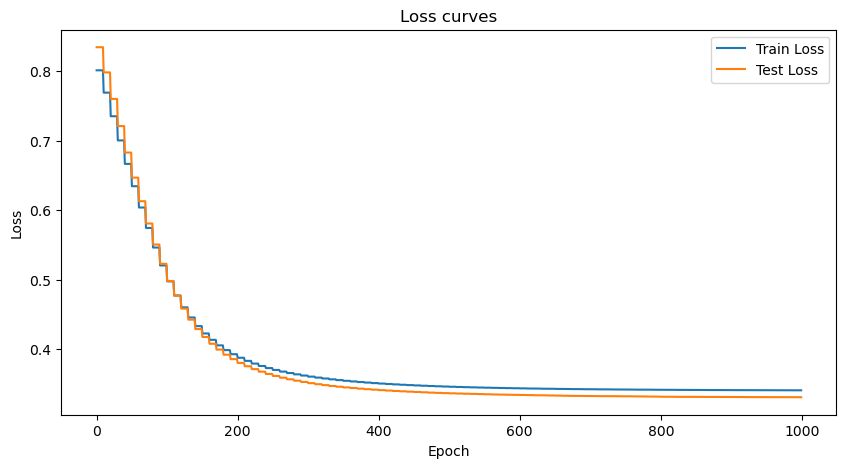

In [10]:
train_loss_hist, test_loss_hist = train.train_ann(ann, train_loader, test_loader, num_epochs = 1000)
train.plot_learning_curve(train_loss_hist, test_loss_hist)

In [ ]:
print(ann.fc1.weight.data)

In [ ]:
print(ann.fc1.bias.data)

In [ ]:
x = torch.linspace(-2.0, 2.0, 200)
y = torch.linspace(-2.0, 2.0, 200)
data = torch.cartesian_prod(x,y).to(device)
out1 = ann.relu(ann.fc1(data))
out2 = ann.fc2(out1)

In [ ]:
x = np.linspace(-2.0,2.0,200)
y = np.linspace(-2.0,2.0,200)

out1 = out1.cpu()
out2 = out2.cpu()

for j, z in enumerate(out1.t()):
    z = z.view(200, 200).detach().numpy()
    plt.contour(x, y, z, [0], linewidths=1, colors ='r')
for j,z in enumerate(out2.t()):
    z = z.view(200, 200).detach().numpy()
    plt.contour(x, y, z, [0], linewidths=1, colors ='b')
plt.show()
for j,z in enumerate(out2.t()):
    plt.imshow(np.gradient(z.view(200,200).detach())[0][::-1][:] )


In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

%load_ext autoreload
%autoreload 2

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

def generate_grid(n):
    x = torch.linspace(-5,5,n)
    y = torch.linspace(-5,5,n)
    grid = torch.cartesian_prod(x,y)
    return grid


def contour_layer(activations, i=0, n=500):
    """
    Plots the zero-level set of the 2D function given 
    a grid of n points as computed by generate_grid.
    
    Args:
        - activations: n x n grid of the function f implemented 
          by the network such that activations[i, j] = f(grid[i, j])
          where grid = generate_grid(n)
        - i: layer index for color and linewidth 
        - n: such that the number of points in the original grid is n**2
    """
    colors = ['green', 'dodgerblue', 'orange']
    x = torch.linspace(-5,5,n).numpy()
    for j, z in enumerate(activations.t()):
        z = z.view(n, n).detach().numpy()
        plt.contour(x, x, z, [1e-4], colors=colors[i], linewidths=2)
    return

#torch.manual_seed(1)


def plot_boundaries(n, h1, h2, s):
    """
    Randomly initializes a two-hidden layer ReLU network 
    with biases and plots the boundaries \Gamma_\nu for 
    each hidden neuron \nu. It assumes the input is 2D
    and the output is scalar.
    
    Args:
        - n: number of points for the grid
        - h1: number of hidden neurons in the first hidden layer
        - h2: number of hidden neurons in the second hidden layer
        - s: scaling factor for better display
    """
    
    # define and randomly initialize network 
    net_1 = nn.Sequential(nn.Linear(2, h1, bias=True), nn.ReLU())
    net_2 = nn.Sequential(nn.Linear(h1, h2 ,bias=True), nn.ReLU())
    net_3 = nn.Sequential(nn.Linear(h2, 1, bias=True))

    # gather activations of various layers 
    x = generate_grid(n)
    out_1 = net_1(s * x)
    out_2 = net_2(out_1)
    out_3 = net_3(out_2)
    out = out_3.view(n, n)

    # display the result
    plt.figure(figsize=(10 ,10))
    contour_layer(out_1, i=0, n=n)
    contour_layer(out_2, i=1, n=n)
    plt.show()
    
    plt.figure(figsize=(10 ,10))
    plt.figure(figsize=(10 ,10))
    plt.imshow(np.gradient(out.detach())[0][::-1][:])
    plt.show()
    
n = 1000
h1 = 4
h2 = 3
s = 20
plot_boundaries(n, h1, h2, s)

In [ ]:
print(Z1)

In [ ]:
np.random.rand(2)